In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2

## Cropping an image with Pillow

In [ ]:
# Step 1: Load the image
image = Image.open('../files/dev22-transmission.png')

width, height = image.size
print(f'Image size: {width} x {height} pixels')

# Step 2: Define the crop area
# The coordinates are in the format: (left, upper, right, lower)
crop_area = (width-300, height-300, width, height)  # Adjust these values for your specific needs

# Step 3: Crop the image
cropped_image = image.crop(crop_area)

new_width, new_height = cropped_image.size
print(f'New image size: {new_width} x {new_height} pixels')

cropped_image.show()

TypeError: Image data of dtype object cannot be converted to float

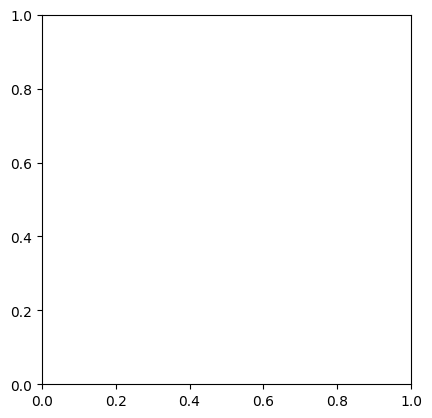

In [59]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def gaussian_2d(xy, amplitude, xo, yo, sigma_x, sigma_y, theta, offset):
    x, y = xy
    xo = float(xo)
    yo = float(yo)    
    a = (np.cos(theta)**2)/(2*sigma_x**2) + (np.sin(theta)**2)/(2*sigma_y**2)
    b = -(np.sin(2*theta))/(4*sigma_x**2) + (np.sin(2*theta))/(4*sigma_y**2)
    c = (np.sin(theta)**2)/(2*sigma_x**2) + (np.cos(theta)**2)/(2*sigma_y**2)
    g = offset + amplitude * np.exp( - (a*((x-xo)**2) + 2*b*(x-xo)*(y-yo) + c*((y-yo)**2)))
    return g

# Read the main image
image = cv2.imread('..files/dev22-transmission.png', 0) 

# plot image in matplotlib
fig,ax = plt.subplots()
plt.imshow(image)  

# Create meshgrid coordinates
w, h = np.meshgrid(np.arange(-25, 25), np.arange(-25, 25))

# Define your gaussian_2d function here (if not already defined)

# Generate Gaussian template
gaussian_template = gaussian_2d((w, h), 1, 0, 0, 10, 10, 0, 0)
fig,ax = plt.subplots()
plt.imshow(gaussian_template)
fig,ax = plt.subplots()
plt.imshow(image)

# Perform template matching
gaussian_template = np.float32(gaussian_template)
image = np.float32(image)
res = cv2.matchTemplate(image, gaussian_template, cv2.TM_CCOEFF_NORMED)


Sum of pixels in box at (321, 9): 243080.0


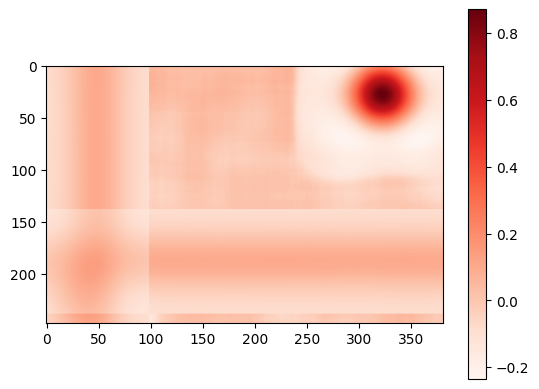

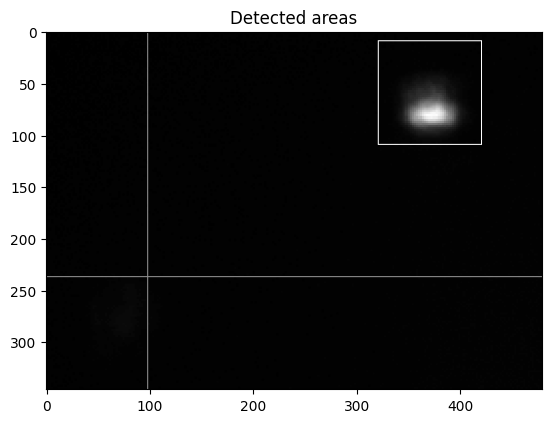

In [86]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def gaussian_2d(xy, amplitude, xo, yo, sigma_x, sigma_y, theta, offset):
    x, y = xy
    xo = float(xo)
    yo = float(yo)    
    a = (np.cos(theta)**2)/(2*sigma_x**2) + (np.sin(theta)**2)/(2*sigma_y**2)
    b = -(np.sin(2*theta))/(4*sigma_x**2) + (np.sin(2*theta))/(4*sigma_y**2)
    c = (np.sin(theta)**2)/(2*sigma_x**2) + (np.cos(theta)**2)/(2*sigma_y**2)
    g = offset + amplitude * np.exp( - (a*((x-xo)**2) + 2*b*(x-xo)*(y-yo) + c*((y-yo)**2)))
    return g

# Read the main image
image_path = '../files/dev22-transmission.png'  # Replace with your image path
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Load in grayscale

# Check if the image was loaded correctly
if image is None:
    raise FileNotFoundError(f"Unable to load the image at {image_path}")

# Generate Gaussian template
template_len = 100
w, h = np.meshgrid(np.arange(-template_len/2, template_len/2), np.arange(-template_len/2, template_len/2))
gaussian_template = gaussian_2d((w, h), 1, 0, 0, 20, 20, 0, 0)

# Convert both image and template to float32
gaussian_template = np.float32(gaussian_template)
image = np.float32(image)

# Ensure that the conversion didn't corrupt the data
if not isinstance(image, np.ndarray) or not isinstance(gaussian_template, np.ndarray):
    raise TypeError("Conversion to float32 resulted in invalid data types")

# Perform template matching
res = cv2.matchTemplate(image, gaussian_template, cv2.TM_CCOEFF_NORMED)


# Set a threshold
threshold = 0.5

# Find where the matching result exceeds the threshold
# include a colorbar
loc = np.where(res >= threshold)
plt.imshow(res, cmap='Reds')

# Dimensions of the template
template_height, template_width = gaussian_template.shape[:2]

all_points = [p for p in zip(*loc[::-1])]
for pt in all_points:
    box = image[pt[1]:pt[1]+template_height, pt[0]:pt[0]+template_width]
    sum_pixels = np.sum(box)


# Find the point with the maximum sum of pixels
max_pt = all_points[np.argmax(sum_pixels)]
max_sum_pixels = np.max(sum_pixels)
print(f"Sum of pixels in box at {max_pt}: {max_sum_pixels}")

# Define the coordinates of the box
top_left = max_pt
bottom_right = (max_pt[0] + template_width, max_pt[1] + template_height)

# Draw the rectangle
cv2.rectangle(image, top_left, bottom_right, (255, 0, 0), 1)

# Display the result
fig,ax = plt.subplots()
plt.imshow(image, cmap='gray')
plt.title('Detected areas')
plt.show()

